In [1]:
import pandas as pd
import numpy as np
import math

In [2]:
plFood = pd.read_csv('../Data/food_places.csv')

In [3]:
plFood.head()

,Unnamed: 0,location_index,location_name,location_latitude,location_longitude,Venue,Venue_Latitude,Venue_Longitude,Venue_Category
0,0,0,Adams city,43.955280,-89.816920,Liquor and Cheese Drive Through,43.947178,-89.817902,Cheese Shop
1,1,0,Adams city,43.955280,-89.816920,A-F County Market,43.966422,-89.819750,Grocery Store
2,2,0,Adams city,43.955280,-89.816920,A-F County Market,43.964313,-89.761070,Grocery Store
3,3,1,Friendship village,43.970526,-89.816793,A-F County Market,43.966422,-89.819750,Grocery Store
4,4,1,Friendship village,43.970526,-89.816793,A-F County Market,43.964313,-89.761070,Grocery Store


In [4]:
plFood[['Venue','location_latitude']].groupby(by = 'Venue').count().sort_values(by = 'location_latitude', ascending = False).head(30)

,location_latitude
Venue,
Pick 'n Save,129
Piggly Wiggly,111
ALDI,90
Walmart Supercenter,85
GNC,75
Walmart Grocery Pickup,50
Festival Foods,36
Sendik's Food Market,21
Metro Market,20


In [5]:
plFood[['Venue_Category','location_latitude']].groupby(by = 'Venue_Category').count().sort_values(by = 'location_latitude', ascending = False).head(20)

,location_latitude
Venue_Category,
Grocery Store,1079
Liquor Store,521
Farmers Market,260
Food & Drink Shop,174
Butcher,158
Gourmet Shop,133
Cheese Shop,104
Big Box Store,93
Supermarket,78


In [6]:
plFood

,Unnamed: 0,location_index,location_name,location_latitude,location_longitude,Venue,Venue_Latitude,Venue_Longitude,Venue_Category
0,0,0,Adams city,43.955280,-89.816920,Liquor and Cheese Drive Through,43.947178,-89.817902,Cheese Shop
1,1,0,Adams city,43.955280,-89.816920,A-F County Market,43.966422,-89.819750,Grocery Store
2,2,0,Adams city,43.955280,-89.816920,A-F County Market,43.964313,-89.761070,Grocery Store
3,3,1,Friendship village,43.970526,-89.816793,A-F County Market,43.966422,-89.819750,Grocery Store
4,4,1,Friendship village,43.970526,-89.816793,A-F County Market,43.964313,-89.761070,Grocery Store
...,...,...,...,...,...,...,...,...,...
3012,3012,592,Marshfield city,44.666940,-90.173610,Market on Sixth,44.662883,-90.177909,Wine Shop
3013,3013,592,Marshfield city,44.666940,-90.173610,GNC,44.678444,-90.161687,Supplement Shop
3014,3014,592,Marshfield city,44.666940,-90.173610,Festival Foods,44.680997,-90.161351,Grocery Store
3015,3015,592,Marshfield city,44.666940,-90.173610,Market La Central,44.655709,-90.181040,Grocery Store


In [7]:
def walmarts(x):
    ws = ['Walmart Supercenter','Walmart Grocery Pickup','Walmart Grocery Pickup and Delivery','Walmart','Walmart Grocery Pickup & Delivery','Walmart Neighborhood Market']
    if x in ws:
        return 'Walmart'
    else:
        return x
    
plFood['Venue'] = plFood['Venue'].apply(walmarts)

In [8]:
inds = list(set(plFood['location_index'].to_numpy()))

newIndex = []
newName = []
newLat = []
newLon = []
newVenue = []
newVenueCat = []

for ind in inds:
    perPlace = plFood[plFood['location_index'] == ind]
    venues = set(perPlace['Venue'].to_numpy())
    for v in venues:
        perVenue = perPlace[perPlace['Venue'] == v]
        cats = list(set(perVenue['Venue_Category'].values))
        
        newIndex.append(ind)
        newName.append(perVenue['location_name'].values[0])
        newLat.append(perVenue['location_latitude'].values[0])
        newLon.append(perVenue['location_longitude'].values[0])
        newVenue.append(perVenue['Venue'].values[0])
        
        if len(cats) == 1:
            newVenueCat.append(perVenue['Venue_Category'].values[0])
        else:
            newVenueCat.append(','.join(list(set(perVenue['Venue_Category'].to_numpy()))))

In [9]:
rplFood = pd.DataFrame()

rplFood['location_index'] = newIndex
rplFood['location_name'] = newName
rplFood['location_latitude'] = newLat
rplFood['location_longitude'] = newLon
rplFood['Venue'] = newVenue
rplFood['Venue_Category'] = newVenueCat

In [10]:
rplFood.head(10)

,location_index,location_name,location_latitude,location_longitude,Venue,Venue_Category
0,0,Adams city,43.955280,-89.816920,Liquor and Cheese Drive Through,Cheese Shop
1,0,Adams city,43.955280,-89.816920,A-F County Market,Grocery Store
2,1,Friendship village,43.970526,-89.816793,Liquor and Cheese Drive Through,Cheese Shop
3,1,Friendship village,43.970526,-89.816793,A-F County Market,Grocery Store
4,2,Butternut village,46.013009,-90.490447,Heritage Meats,Butcher
5,3,Mellen city,46.325750,-90.660663,Northland Foods/Hardware Hank/Clark,Grocery Store
6,4,Ashland city,46.590000,-90.880000,Walmart,"Grocery Store,Big Box Store"
7,4,Ashland city,46.590000,-90.880000,6th Street Market,Grocery Store
8,4,Ashland city,46.590000,-90.880000,Star Liquor,Liquor Store
9,4,Ashland city,46.590000,-90.880000,Frozen Side,Grocery Store


In [11]:
rplFood[['Venue','location_latitude']].groupby(by = 'Venue').count().sort_values(by = 'location_latitude', ascending = False).head(50)

,location_latitude
Venue,
Piggly Wiggly,98
Walmart,95
Pick 'n Save,84
ALDI,76
GNC,68
Festival Foods,31
Sendik's Food Market,18
Metro Market,18
Fresh Thyme Farmers Market,14


In [12]:
rplFood[['Venue_Category','location_latitude']].groupby(by = 'Venue_Category').count().sort_values(by = 'location_latitude', ascending = False).head(50)

,location_latitude
Venue_Category,
Grocery Store,915
Liquor Store,515
Farmers Market,260
Food & Drink Shop,172
Butcher,158
Gourmet Shop,133
Cheese Shop,103
Supplement Shop,68
Supermarket,64


In [13]:
def selectSome(x):
    cats = ['Grocery Store','Farmers Market','Supermarket','Organic Grocery','Convenience Store','Big Box Store']
    x = x.split(',')
    for i in x:
        if i in cats:
            return 1
    return 0

In [14]:
rplFood['select'] = rplFood['Venue_Category'].apply(selectSome)

In [15]:
rplFood[rplFood['select'] == 1][['Venue','location_latitude']].groupby(by = 'Venue').count().sort_values(by = 'location_latitude', ascending = False).head(50)

,location_latitude
Venue,
Piggly Wiggly,96
Walmart,95
Pick 'n Save,84
ALDI,76
Festival Foods,31
Metro Market,18
Sendik's Food Market,18
Fresh Thyme Farmers Market,14
Meijer,13


In [16]:
civiPop = pd.read_csv('../Data/civiPop.csv')

In [17]:
small = civiPop[civiPop['CENSUS2010POP'] < 39000]
small.head()

,Unnamed: 0,COUNTY,NAME,STNAME,CENSUS2010POP,POPESTIMATE2019,Type,Name,County Name,address,Latitude,Longitude
0,603,1,Adams city,Wisconsin,1967,1893,city,Adams,ADAMS,"Adams, ADAMS, wi",39.865324,-91.198197
1,604,1,Friendship village,Wisconsin,725,657,village,Friendship,ADAMS,"Friendship, ADAMS, wi",43.970526,-89.816793
2,632,3,Butternut village,Wisconsin,375,355,village,Butternut,ASHLAND,"Butternut, ASHLAND, wi",46.013009,-90.490447
3,633,3,Mellen city,Wisconsin,731,695,city,Mellen,ASHLAND,"Mellen, ASHLAND, wi",46.325750,-90.660663
4,636,3,Ashland city,Wisconsin,8216,7843,city,Ashland,ASHLAND,"Ashland, ASHLAND, wi",46.590000,-90.880000


In [18]:
rplFood

,location_index,location_name,location_latitude,location_longitude,Venue,Venue_Category,select
0,0,Adams city,43.955280,-89.816920,Liquor and Cheese Drive Through,Cheese Shop,0
1,0,Adams city,43.955280,-89.816920,A-F County Market,Grocery Store,1
2,1,Friendship village,43.970526,-89.816793,Liquor and Cheese Drive Through,Cheese Shop,0
3,1,Friendship village,43.970526,-89.816793,A-F County Market,Grocery Store,1
4,2,Butternut village,46.013009,-90.490447,Heritage Meats,Butcher,0
...,...,...,...,...,...,...,...
2828,592,Marshfield city,44.666940,-90.173610,Festival Foods,Grocery Store,1
2829,592,Marshfield city,44.666940,-90.173610,PJ's Tropical Paradise,Beer Store,0
2830,592,Marshfield city,44.666940,-90.173610,Farmers Market,Farmers Market,1
2831,592,Marshfield city,44.666940,-90.173610,Festival Foods Farmer's Market,Farmers Market,1


In [19]:
pops = []
for ind, row in rplFood.iterrows():
    pops.append(small.loc[row['location_index']]['CENSUS2010POP'])

In [20]:
rplFood['Population'] = pops

In [21]:
inds = list(set(rplFood['location_index'].to_numpy()))
pop = []
w = []

for i in inds:
    perLoc = rplFood[rplFood['location_index'] == i]
    pop.append(perLoc['Population'].values[0])
    w.append(1 if 'Walmart' in perLoc['Venue'].values else 0)

In [22]:
splFood = pd.DataFrame()
splFood['location_index'] = inds
splFood['Population'] = pop
splFood['Walmart'] = w

In [23]:
lenInterval = 100
maxVal = 37920
totIntervals = math.ceil(maxVal/lenInterval)
borders = [i*lenInterval for i in range(totIntervals+1)]

def makegroups(x):
    for i in range(totIntervals):
        if (borders[i] <= x) & (x < borders[i+1]):
            return round((borders[i]+borders[i+1])/2)
    return 0

splFood['group'] = splFood['Population'].apply(makegroups)
splFood['count'] = np.ones((splFood.shape[0],1))

In [24]:
toPlot = splFood[['Walmart','group','count']].sort_values(by = 'group').groupby(by = 'group').sum()

In [25]:
toPlot['prob'] = toPlot.apply(lambda x: x['Walmart']/x['count'], axis = 1)

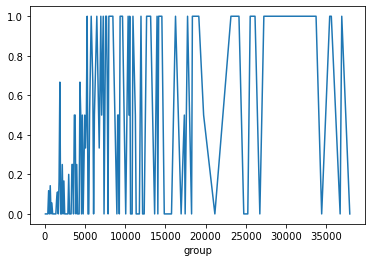

In [26]:
toPlot['prob'].plot()

In [27]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [28]:
kclusters = 12

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state = 0).fit(splFood['Population'].to_numpy().reshape((-1,1)))

# check cluster labels generated for each row in the dataframe
splFood['group'] = kmeans.labels_

In [29]:
val = []

for i in range(kclusters):
    perCluster = splFood[splFood['group'] == i]['Population']
    val.append(round((perCluster.max() + perCluster.min())/2))

In [30]:
toPlot = splFood[['Walmart','group','count']].sort_values(by = 'group').groupby(by = 'group').sum()
toPlot['mids'] = val
toPlot['prob'] = toPlot.apply(lambda x: x['Walmart']/x['count'], axis = 1)
toPlot.sort_values(by = 'mids', inplace = True)
toPlot.set_index('mids',drop = True, inplace = True)

In [31]:
toPlot

,Walmart,count,prob
mids,,,
584,4,121.0,0.033058
1664,8,86.0,0.093023
3020,6,63.0,0.095238
4568,10,30.0,0.333333
6408,11,20.0,0.550000
8597,19,26.0,0.730769
11478,10,24.0,0.416667
14713,9,15.0,0.600000
19060,5,11.0,0.454545


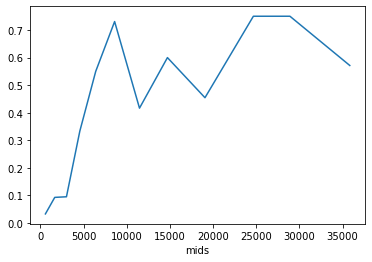

In [32]:
toPlot['prob'].plot()

In [33]:
inds = list(set(rplFood['location_index'].to_numpy()))
pop = []
w = []

for i in inds:
    perLoc = rplFood[rplFood['location_index'] == i]
    pop.append(perLoc['Population'].values[0])
    w.append(1 if 'Piggly Wiggly' in perLoc['Venue'].values else 0)

In [34]:
splFood = pd.DataFrame()
splFood['location_index'] = inds
splFood['Population'] = pop
splFood['Piggly Wiggly'] = w
splFood['count'] = np.ones((splFood.shape[0],1))

In [35]:
kclusters = 12

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state = 0).fit(splFood['Population'].to_numpy().reshape((-1,1)))

# check cluster labels generated for each row in the dataframe
splFood['group'] = kmeans.labels_

In [36]:
toPlot1 = splFood[['Piggly Wiggly','group','count']].sort_values(by = 'group').groupby(by = 'group').sum()
toPlot1['mids'] = val
toPlot1['prob'] = toPlot1.apply(lambda x: x['Piggly Wiggly']/x['count'], axis = 1)
toPlot1.sort_values(by = 'mids', inplace = True)
toPlot1.set_index('mids',drop = True, inplace = True)

In [37]:
toPlot1

,Piggly Wiggly,count,prob
mids,,,
584,12,121.0,0.099174
1664,9,86.0,0.104651
3020,18,63.0,0.285714
4568,11,30.0,0.366667
6408,8,20.0,0.400000
8597,9,26.0,0.346154
11478,10,24.0,0.416667
14713,6,15.0,0.400000
19060,3,11.0,0.272727


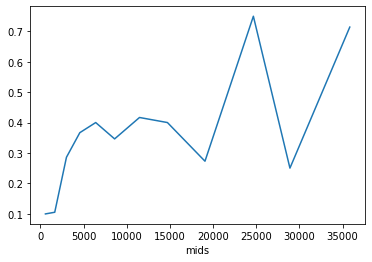

In [38]:
toPlot1['prob'].plot()

In [39]:
toPlot2 = toPlot1[['count','Piggly Wiggly']]
toPlot2['Walmart'] = toPlot['Walmart']
toPlot2['Piggly Wiggly P'] = toPlot2.apply(lambda x: x['Piggly Wiggly']/x['count'], axis = 1)
toPlot2['Walmart P'] = toPlot2.apply(lambda x: x['Walmart']/x['count'], axis = 1)

In [40]:
toPlot2

,count,Piggly Wiggly,Walmart,Piggly Wiggly P,Walmart P
mids,,,,,
584,121.0,12,4,0.099174,0.033058
1664,86.0,9,8,0.104651,0.093023
3020,63.0,18,6,0.285714,0.095238
4568,30.0,11,10,0.366667,0.333333
6408,20.0,8,11,0.400000,0.550000
8597,26.0,9,19,0.346154,0.730769
11478,24.0,10,10,0.416667,0.416667
14713,15.0,6,9,0.400000,0.600000
19060,11.0,3,5,0.272727,0.454545


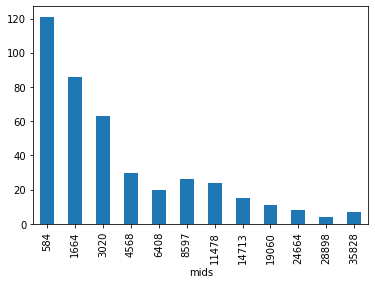

In [43]:
toPlot2['count'].plot(kind = 'bar')

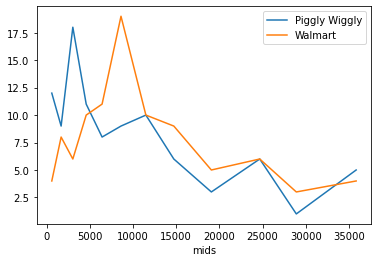

In [41]:
toPlot2[['Piggly Wiggly','Walmart']].plot()

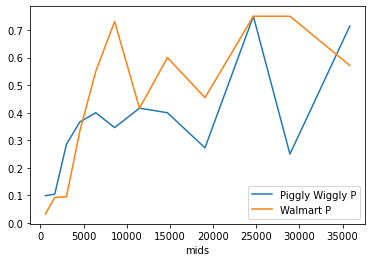

In [42]:
toPlot2[['Piggly Wiggly P','Walmart P']].plot()